<a href="https://colab.research.google.com/github/Ozziekins/ColabWorks/blob/main/ML_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Assignment 1  
---
**Student name:** Ozioma Okonicha  
**Group:** SE-01  

In this assignment, I am going to solve two problems. I will try different regression
models to find the best model that fits a function in the first one. In the second problem,
I will use logistic regression to help a bank discover whether a customer will subscribe to
the term deposit or not. 


### Task 1:  Linear/Polynomial Regression (5 points)  

First of all, I will create a synthetic dataset by sampling from data generated by adding some random Gaussian noise to a sinusoidal function.

In [ ]:
import numpy as np

# Adding some random Gaussian noise to a sinusoidal function
rng = np.random.RandomState(1)
x = 10 * rng.rand(100)
y = np.sin(x) + 0.1 * rng.randn(100)

# Add one more dimension for x
X = np.expand_dims(x, axis=1)


I will construct four polynomial models of degrees 1, 3, 11 and 21. The first model is basically linear since it is of degree one.

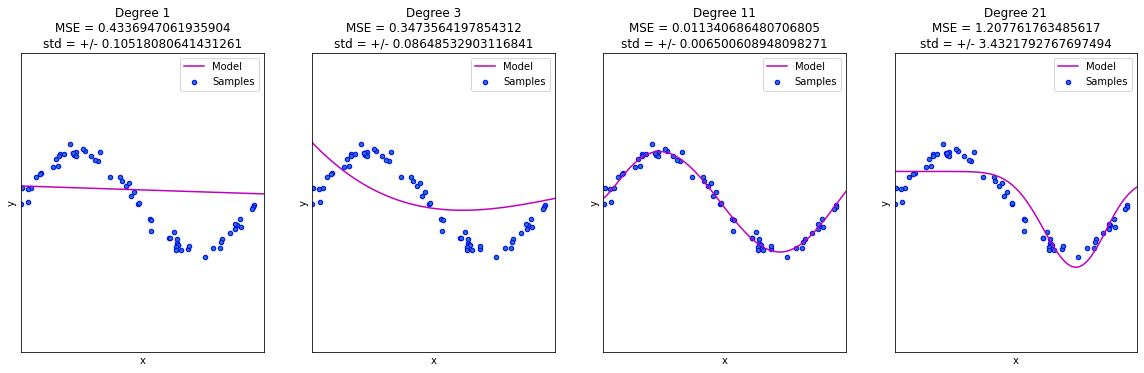

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
%matplotlib inline 

degrees = [1, 3, 11, 21]
n = len(degrees)
best_score = 999  # some random large number for comparison
best_degree = 0

mses = []
stds = []

plt.figure(figsize=(20, 5.5))

for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                        ("linear_regression", linear_regression)])
    pipeline.fit(X, y)

    # Evaluate the models' accuracy using cross-validation with k=10
    scores = cross_val_score(pipeline, X, y,
                            scoring="neg_mean_squared_error", cv=10)
    
    # Get the best degree with the least MSE
    if -scores.mean() < best_score:
        best_score = -scores.mean()
        best_degree = degrees[i]

    x_test = np.linspace(0, 10, 100)

    # Add one more dimension to x_test
    X_test = np.expand_dims(x_test, axis=1)

    # Plot all models with mean and std
    plt.plot(x_test, pipeline.predict(X_test), color='m', label="Model")
    # plt.plot(x_test, np.sin(x_test), color='g', label="True function")
    plt.scatter(x, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 6.5))
    plt.ylim((-3, 3))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {}\nstd = +/- {}".format(degrees[i], -scores.mean(), scores.std()))

    mses.append(-scores.mean())
    stds.append(scores.std())


Let's now plot the MSE/std graph to visually see the differences

Average MSE for the fold:  0.5000383939863364
Average std for the fold:  0.9075865052908322
--------------------------------
Best MSE is  0.011340686480706805
Best degree is  11


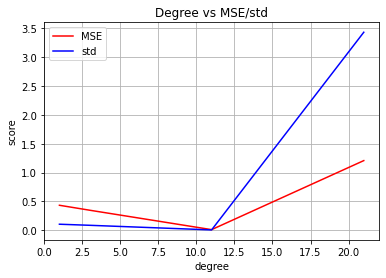

In [ ]:
# Plot the graphs of degree vs (mse|std)
plt.plot(degrees, mses, color='r', label="MSE")
plt.plot(degrees, stds, color='b', label="std")
plt.xlabel("degree")
plt.ylabel("score")
plt.legend(loc="best")
plt.title("Degree vs MSE/std")
plt.grid(axis='both')

# Printing reports
avg_mse = sum(mses)/len(mses)
print("Average MSE for the fold: ", avg_mse)
avg_std = sum(stds)/len(stds)
print("Average std for the fold: ", avg_std)

print("--------------------------------")

print("Best MSE is ", best_score)
print("Best degree is ", best_degree)


From the result above, we see that the best model with the least MSE is the model with degree **11**.

So below I will regularize the model with degree 11, using both **L1** and **L2** regularizations.

### L1 Regularization- Lasso
----

In [ ]:
from sklearn.linear_model import Lasso
import warnings
warnings.simplefilter('ignore')

# L1 Regularization

polynomial_features = PolynomialFeatures(degree=best_degree, include_bias=False)
lasso = Lasso(alpha=0.001)
lasso_model = Pipeline([("polynomial_features", polynomial_features),
                      ("lasso", lasso)])
lasso_model.fit(X, y)

# Evaluate the models' accuracy using cross-validation with k=10
lasso_scores = cross_val_score(lasso_model, X, y,
                          scoring="neg_mean_squared_error", cv=10)

print("With L1 Regularization: ")
print("MSE: ", -lasso_scores.mean(), "\nstd: ", lasso_scores.std())


With L1 Regularization: 
MSE:  0.14760795839662538 
std:  0.06561477778057956


### L2 Regularization- Ridge
---

In [ ]:
from sklearn.linear_model import Ridge
import warnings
warnings.simplefilter('ignore')

# L2 Regularization

polynomial_features = PolynomialFeatures(best_degree, include_bias=False)
ridge = Ridge(alpha=0.1)
ridge_model = Pipeline([("polynomial_features", polynomial_features),
                    ("ridge", ridge)])
ridge_model.fit(X, y)

# Evaluate the models' accuracy using cross-validation with k=10
ridge_scores = cross_val_score(ridge_model, X, y,
                          scoring="neg_mean_squared_error", cv=10)

print("With L2 Regularization: ")
print("MSE: ", -ridge_scores.mean(), "\nstd: ", ridge_scores.std())


With L2 Regularization: 
MSE:  0.01057303696911753 
std:  0.00598597099033981


Text(0.5, 1.0, 'Best model with L2 regularization\nMSE = 0.01057303696911753\nstd = +/- 0.00598597099033981')

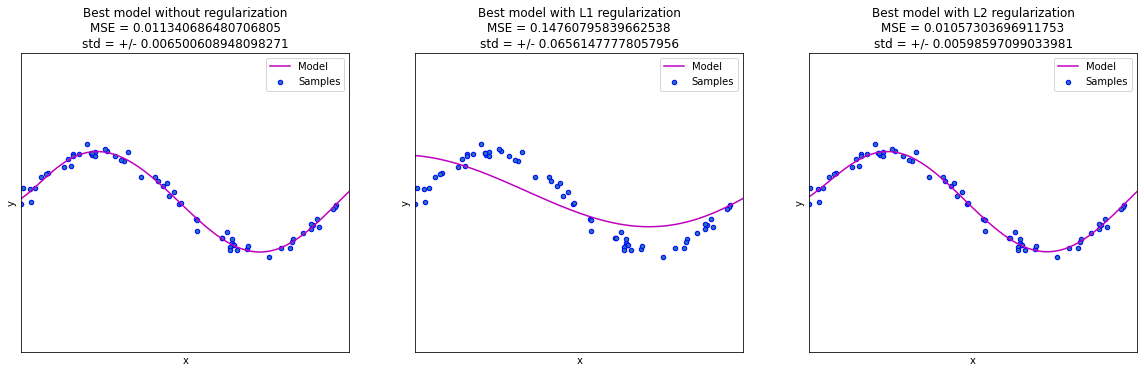

In [ ]:
plt.figure(figsize=(20, 5.5))

# Best model without regularization
polynomial_features = PolynomialFeatures(degree=best_degree, include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                    ("linear_regression", linear_regression)])
pipeline.fit(X, y)

score = cross_val_score(pipeline, X, y,
                          scoring="neg_mean_squared_error", cv=10)

ax = plt.subplot(1, 3, 1)
plt.setp(ax, xticks=(), yticks=())
plt.plot(x_test, pipeline.predict(X_test), color='m', label="Model")
# plt.plot(x_test, np.sin(x_test), color='g', label="True function")
plt.scatter(x, y, edgecolor='b', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 6.5))
plt.ylim((-3, 3))
plt.legend(loc="best")
plt.title("Best model without regularization\nMSE = {}\nstd = +/- {}".format(-score.mean(), score.std()))

# Best model with L1 regularization
ax = plt.subplot(1, 3, 2)
plt.setp(ax, xticks=(), yticks=())
plt.plot(x_test, lasso_model.predict(X_test), color='m', label="Model")
# plt.plot(x_test, np.sin(x_test), color='g', label="True function")
plt.scatter(x, y, edgecolor='b', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 6.5))
plt.ylim((-3, 3))
plt.legend(loc="best")
plt.title("Best model with L1 regularization\nMSE = {}\nstd = +/- {}".format(-lasso_scores.mean(), lasso_scores.std()))

# Best model with L2 regularization
ax = plt.subplot(1, 3, 3)
plt.setp(ax, xticks=(), yticks=())
plt.plot(x_test, ridge_model.predict(X_test), color='m', label="Model")
# plt.plot(x_test, np.sin(x_test), color='g', label="True function")
plt.scatter(x, y, edgecolor='b', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 6.5))
plt.ylim((-3, 3))
plt.legend(loc="best")
plt.title("Best model with L2 regularization\nMSE = {}\nstd = +/- {}".format(-ridge_scores.mean(), ridge_scores.std()))


Next we will just compare the all the models and show if the model performs better with applying regularization.


Polynomial Regression : 0.011340686480706805
Lasso Regression : 0.14760795839662538
Ridge Regression : 0.01057303696911753


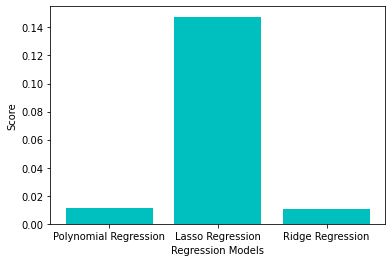

In [ ]:
# Building the two lists for visualization 
models = ['Polynomial Regression', 'Lasso Regression', 'Ridge Regression'] 
scores = [-score.mean(), 
         -lasso_scores.mean(), 
         -ridge_scores.mean()] 

# Building the dictionary to compare the scores 
mapping = {} 
mapping['Polynomial Regression'] = -score.mean()
mapping['Lasso Regression'] = -lasso_scores.mean()
mapping['Ridge Regression'] = -ridge_scores.mean()
  
# Printing the scores for different models 
for key, val in mapping.items(): 
    print(str(key)+' : '+str(val))


# Plotting the scores 
plt.bar(models, scores, color='c') 
plt.xlabel('Regression Models') 
plt.ylabel('Score') 
plt.show()


At the end, we see that the model performs best with L2 Regularization!

### Task 2: Logistic Regression- Data Reading and preprocessing (5 points)

In [ ]:
import pandas as pd

# Step 1: Import the libraries
# Step 2: Import the dataset
dataset = pd.read_csv('banking.csv')

x = dataset.loc[:, :'nr_employed']
y = dataset['y']

dataset.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [ ]:

x.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2


In [ ]:
# show the categorical features
types = dataset.dtypes
print("Number categorical featues:", sum(types=='object'))
print(types)


Number categorical featues: 10
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays             float64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Step 3: Encode the Categorical data

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

def ohe_new_features(df, feature_name, encoder):
    new_features = encoder.transform(df[feature_name])
    new_column = pd.DataFrame(new_features, dtype=int, columns=encoder.get_feature_names(feature_name))
    new_dataframe = pd.concat([df, new_column], axis=1)
    new_dataframe = new_dataframe.drop(feature_name, axis=1, inplace=False)
    return new_dataframe

feats = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
encoder.fit(x[feats])
x = ohe_new_features(x, feats, encoder)


In [ ]:
x.head(5)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999.0,0,1.4,93.444,-36.1,4.963,5228.1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999.0,0,-0.1,93.200,-42.0,4.021,5195.8,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6.0,2,-1.7,94.055,-39.8,0.729,4991.6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,39,185,2,999.0,0,-1.8,93.075,-47.1,1.405,5099.1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3.0,1,-2.9,92.201,-31.4,0.869,5076.2,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [ ]:
from sklearn.impute import SimpleImputer

# Step 4: Check out the missing values and impute them using the mean value strategy.

def count_nans(df):
    nans = pd.isna(df)
    count = nans.sum().sum()
    return count

print("number of empty cells in the dataset is ", count_nans(x))

imp = SimpleImputer(strategy='mean')
imp.fit(x)
x_imp = pd.DataFrame(imp.transform(x), columns=x.columns)

print("number of empty cells in x_train_imp is ", count_nans(x_imp))


number of empty cells in the dataset is  4
number of empty cells in x_train_imp is  0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Step 5: Feature scaling

scale = MinMaxScaler()
scale.fit(x_imp)
x_scaled = pd.DataFrame(scale.transform(x_imp), columns=x_imp.columns)

x_scaled.head(5)


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.333333,0.042700,0.000000,1.000000,0.000000,1.000000,0.484412,0.615063,0.981410,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.444444,0.028060,0.000000,1.000000,0.000000,0.687500,0.389322,0.368201,0.767853,0.877883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.135802,0.068930,0.036364,0.006006,0.285714,0.354167,0.722525,0.460251,0.021537,0.105860,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.271605,0.037617,0.018182,1.000000,0.000000,0.333333,0.340608,0.154812,0.174790,0.512287,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.469136,0.027857,0.000000,0.003003,0.142857,0.104167,0.000000,0.811715,0.053276,0.425709,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
from sklearn.model_selection import train_test_split

# Step 6: Splitting the dataset into Training (80 %) and Test set (20 %)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2)

###  Logistic Regression- Model Creation (5 points)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import FitFailedWarning
import warnings
warnings.simplefilter('always', FitFailedWarning)

logreg = LogisticRegression()

C = np.logspace(-4, 4, 20)
penalty = ['l1', 'l2']
solver = ['liblinear', 'lbfgs']

param_grid = dict(C=C, penalty=penalty, solver=solver)

logreg_cv = GridSearchCV(logreg, param_grid=param_grid, cv=5)

with warnings.catch_warnings(record=True) as w:
    try:
        logreg_cv.fit(x_train, y_train)
    except ValueError:
        pass
    print(repr(w[-1].message))


print("Tuned hyperparameters->(Best parameters):\n", logreg_cv.best_params_)


FitFailedWarning("Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: \nValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.\n",)
Tuned hyperparameters->(Best parameters):
 {'C': 1438.44988828766, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

y_pred = logreg_cv.predict(x_test)

# Calculate and print metrics
acc = metrics.accuracy_score(y_test, y_pred)
prec = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
print("Accuracy = ", acc)
print("Precision = ", prec)
print("Recall = ", recall)

Accuracy =  0.9088370963826171
Precision =  0.6813008130081301
Recall =  0.43018480492813144
